# Rate Networks

In [3]:
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import ipywidgets as widgets
import scipy

%matplotlib inline

# Settings for the figures
plt.style.use(plt.style.available[20])
plt.style.use("https://github.com/comp-neural-circuits/intro-to-comp-neuro/raw/dev/plots_style.txt")


\begin{equation}
F(x;\alpha,\theta) = \left(1+\text{e}^{-\frac{x-\theta}{\alpha}}\right)^{-1} - \left(1+\text{e}^{\frac{\theta}{\alpha}}\right)^{-1}
\end{equation}

interactive(children=(FloatSlider(value=0.2, description='alpha', max=1.0, min=0.01, step=0.01), IntSlider(val…

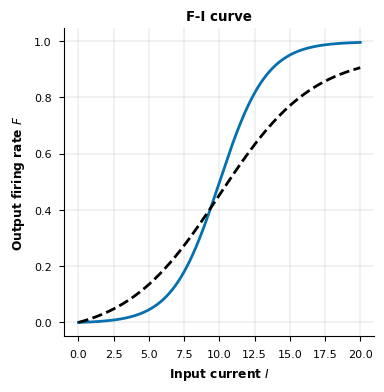

In [19]:
def nonlinearity_f(x, alpha, theta):    
    return (1 + np.exp(-alpha*(x - theta)))**-1 - (1 + np.exp(alpha*theta))**-1

fig, ax = plt.subplots(figsize = (4,4))
X = np.linspace(0,20,1000)
ax.plot(X, nonlinearity_f(X, alpha=0.6, theta=10))
ax.plot(X, nonlinearity_f(X, alpha=0.6, theta=14), linestyle = '--', c='k')
ax.set(
    title = 'F-I curve',
    xlabel = 'Input current $I$',
    ylabel = 'Output firing rate $F$',
);


def interactive_f(alpha=0.2, theta=40):
    
    x_max = 80
    fig, ax = plt.subplots(figsize = (14,8))
    X = np.linspace(-0.1,x_max,100)
    ax.plot(X, nonlinearity_f(X, alpha=alpha, theta=theta), color='#6baed6', linewidth = 3)
    
    y_theta = nonlinearity_f(theta, alpha=alpha, theta=theta)
    
    ax.plot([theta,theta],[0,y_theta],
           linestyle = '--', c = '#e34a33', linewidth=1, label = r'threshold $\theta$')
    
    # we want to visualize the gain of the 
    
    diff = 8
    
    ax.plot([theta-diff,theta+diff],[y_theta-diff*alpha/4, y_theta+diff*alpha/4],
           linestyle = '--', c = 'k', linewidth=1, label = r'linear function with gain $\alpha/4$')
    
    ax.set(
        title = 'F-I curve',
        xlabel = 'Input current',
        ylabel = 'Output rate',
        ylim = [-0.05,1.05],
        xlim = [-0.05*x_max,x_max*1.05]
    );
    ax.legend()
    
widgets.interactive(interactive_f, alpha = (0.01,1,0.01), theta=(0,60,10))

Text(0, 0.5, 'firing rate $r$')

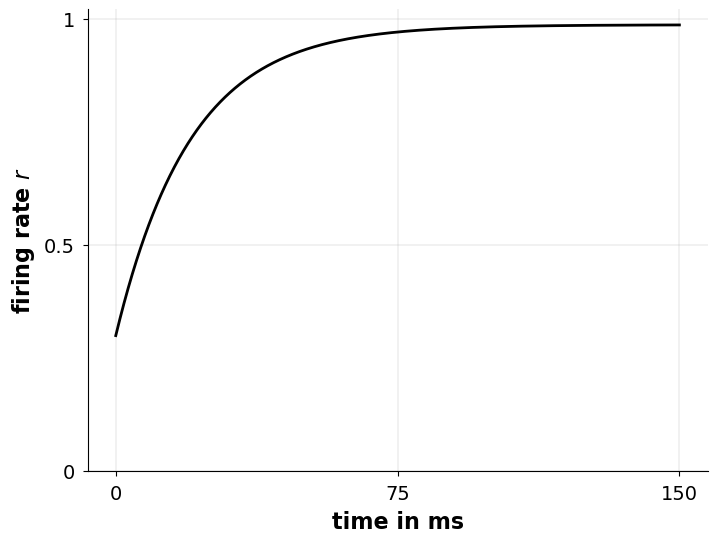

In [52]:
r_0 = 0.3
I_ext = 20

fig, ax = plt.subplots()

nonlinearity_f

r_list = [r_0]
t_list = [0]
dt = 0.1
tau = 20
for ii in range(1500):
    t_list.append(t_list[-1]+dt)
    r_list.append(r_list[-1] + dt*(-r_list[-1]+nonlinearity_f(I_ext,alpha=0.5,theta=10))/tau)

ax.plot(t_list, r_list, color='k')
ax.set_xticks([0,75,150])
ax.set_xticklabels([0,75,150],fontsize=14)
ax.set_yticks([0,0.5,1])
ax.set_yticklabels([0,0.5,1],fontsize=14)
ax.set_xlabel('time in ms', fontsize=16)
ax.set_ylabel('firing rate $r$', fontsize=16)

\begin{align}
\tau_E \frac{dr_E}{dt} &= -r_E + F(w_{EE}r_E -w_{EI}r_I + I^{\text{ext}}_E;\alpha_E,\theta_E) \\
\tau_I \frac{dr_I}{dt} &= -r_I + F(w_{IE}r_E -w_{II}r_I + I^{\text{ext}}_I;\alpha_I,\theta_I) \qquad (1)
\end{align}



Text(0, 0.5, '$\\frac{dr}{dt}$')

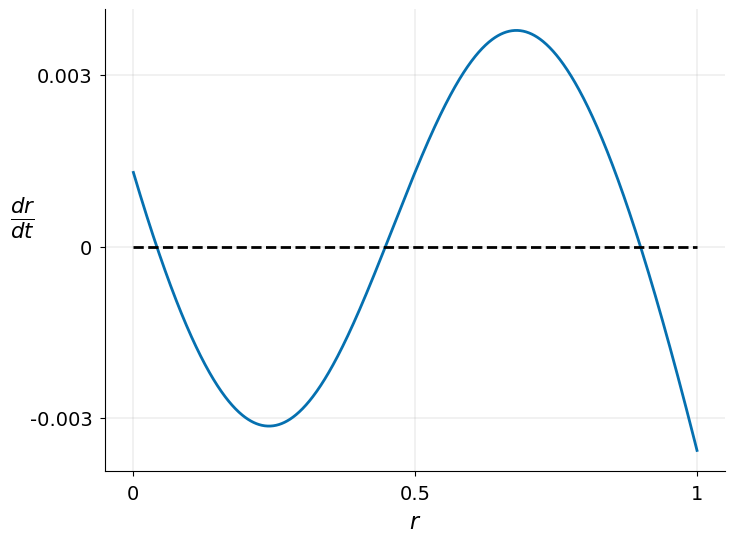

In [77]:
def compute_drdt(r, I_ext, w, alpha, theta, tau, **other_pars):
  """Given parameters, compute dr/dt as a function of r.

  Args:
    r (1D array) : Average firing rate of the excitatory population
    I_ext, w, a, theta, tau (numbers): Simulation parameters to use
    other_pars : Other simulation parameters are unused by this function

  Returns
    drdt function for each value of r
  """
  # Calculate drdt
  drdt = (-r + nonlinearity_f(w * r + I_ext, alpha, theta)) / tau

  return drdt


# Define a vector of r values and the simulation parameters
r = np.linspace(0, 1, 1000)

# Compute dr/dt
drdt = compute_drdt(r, I_ext = 0.5, w = 5, alpha = 1.2, theta = 2.8, tau = 20)

fig, ax = plt.subplots()
ax.plot(r, drdt)
ax.plot([0,1],[0,0],linestyle = '--', color = 'k')

x_ticks = [0,0.5,1]
y_ticks = [-0.003, 0, 0.003]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks,fontsize=14)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks,fontsize=14)
ax.set_xlabel('$r$', fontsize=16, fontweight='bold')
ax.set_ylabel(r'$\frac{dr}{dt}$', fontsize=22, rotation=0, fontweight='bold')

Text(0, 0.5, 'firing rate $r$')

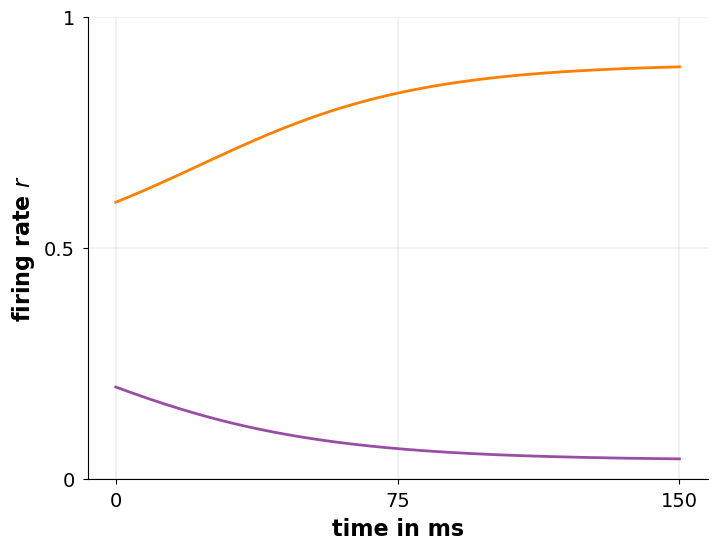

In [92]:


fig, ax = plt.subplots()



r_0 = 0.2
I_ext = 0.5
w=5
r_list = [r_0]
t_list = [0]
dt = 0.1
tau = 20
for ii in range(1500):
    t_list.append(t_list[-1]+dt)
    r_list.append(r_list[-1] + dt*(-r_list[-1] + nonlinearity_f(w*r_list[-1]+I_ext,alpha=1.2,theta=2.8))/tau)

ax.plot(t_list, r_list, color='#984ea3')

r_0 = 0.6
r_list = [r_0]
t_list = [0]
for ii in range(1500):
    t_list.append(t_list[-1]+dt)
    r_list.append(r_list[-1] + dt*(-r_list[-1] + nonlinearity_f(w*r_list[-1]+I_ext,alpha=1.2,theta=2.8))/tau)

ax.plot(t_list, r_list, color='#ff7f00')



ax.set_xticks([0,75,150])
ax.set_xticklabels([0,75,150],fontsize=14)
ax.set_yticks([0,0.5,1])
ax.set_yticklabels([0,0.5,1],fontsize=14)
ax.set_xlabel('time in ms', fontsize=16)
ax.set_ylabel('firing rate $r$', fontsize=16)